# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        #print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | dikson
Processing Record 4 of Set 1 | barreirinhas
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | luderitz
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | angoche
Processing Record 9 of Set 1 | half moon bay
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | okhotsk
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | grand centre
Processing Record 14 of Set 1 | mbini
Processing Record 15 of Set 1 | airai
Processing Record 16 of Set 1 | belaya gora
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | verkhnevilyuysk
Processing Record 19 of Set 1 | saqqez
Processing Record 20 of Set 1 | pemangkat
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | bluff
Processing Record 23 of Set 

Processing Record 47 of Set 4 | amli
Processing Record 48 of Set 4 | san andres
Processing Record 49 of Set 4 | karla
Processing Record 0 of Set 5 | onnaing
Processing Record 1 of Set 5 | thompson
Processing Record 2 of Set 5 | cabo san lucas
Processing Record 3 of Set 5 | sharan
Processing Record 4 of Set 5 | sheridan
Processing Record 5 of Set 5 | hambantota
Processing Record 6 of Set 5 | lavrentiya
Processing Record 7 of Set 5 | kastamonu
Processing Record 8 of Set 5 | poum
Processing Record 9 of Set 5 | buala
Processing Record 10 of Set 5 | naya bazar
Processing Record 11 of Set 5 | kiama
Processing Record 12 of Set 5 | smolenka
Processing Record 13 of Set 5 | karratha
Processing Record 14 of Set 5 | belyy yar
Processing Record 15 of Set 5 | butaritari
Processing Record 16 of Set 5 | cidreira
Processing Record 17 of Set 5 | penzance
Processing Record 18 of Set 5 | carnarvon
Processing Record 19 of Set 5 | la libertad
Processing Record 20 of Set 5 | victoria
Processing Record 21 of 

Processing Record 47 of Set 8 | shimanovsk
Processing Record 48 of Set 8 | handwara
Processing Record 49 of Set 8 | kalmanka
Processing Record 0 of Set 9 | husavik
Processing Record 1 of Set 9 | flinders
Processing Record 2 of Set 9 | mehamn
Processing Record 3 of Set 9 | halalo
Processing Record 4 of Set 9 | barahona
Processing Record 5 of Set 9 | rovaniemi
Processing Record 6 of Set 9 | jacareacanga
Processing Record 7 of Set 9 | tura
Processing Record 8 of Set 9 | banjar
Processing Record 9 of Set 9 | isangel
Processing Record 10 of Set 9 | kamina
Processing Record 11 of Set 9 | chokurdakh
Processing Record 12 of Set 9 | attawapiskat
Processing Record 13 of Set 9 | pisco
Processing Record 14 of Set 9 | solsvik
Processing Record 15 of Set 9 | kinanah
Processing Record 16 of Set 9 | atherton
Processing Record 17 of Set 9 | yar-sale
Processing Record 18 of Set 9 | manakara
Processing Record 19 of Set 9 | hihifo
Processing Record 20 of Set 9 | mandiana
Processing Record 21 of Set 9 | na

Processing Record 42 of Set 12 | sandnessjoen
Processing Record 43 of Set 12 | gondar
Processing Record 44 of Set 12 | bela vista do paraiso
Processing Record 45 of Set 12 | saurimo
Processing Record 46 of Set 12 | kidal
Processing Record 47 of Set 12 | ruwi
Processing Record 48 of Set 12 | harlingen
Processing Record 49 of Set 12 | akonolinga
Processing Record 0 of Set 13 | camapua
Processing Record 1 of Set 13 | tabuleiro do norte
Processing Record 2 of Set 13 | costinesti
Processing Record 3 of Set 13 | koster
Processing Record 4 of Set 13 | nelson bay
Processing Record 5 of Set 13 | bandarbeyla
Processing Record 6 of Set 13 | loiza
Processing Record 7 of Set 13 | toma
Processing Record 8 of Set 13 | belle glade
Processing Record 9 of Set 13 | wladyslawowo
Processing Record 10 of Set 13 | umm durman
-----------------------------
Data Retrieval Complete      
-----------------------------


In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0  punta arenas -53.1500  -70.9167     17.06        27           0   
1   yerbogachen  61.2767  108.0108    -40.43        98          97   
2        dikson  73.5069   80.5464    -22.61        94         100   
3  barreirinhas  -2.7469  -42.8264     25.49        84          21   
4       ushuaia -54.8000  -68.3000     13.81        44           0   

   Wind Speed Country        Date  
0        5.66      CL  1674424011  
1        2.88      RU  1674424011  
2       11.73      RU  1674424012  
3        2.96      BR  1674424012  
4        5.14      AR  1674424012

In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                    
0        punta arenas -53.1500  -70.9167     17.06        27           0   
1         yerbogachen  61.2767  108.0108    -40.43        98          97   
2              dikson  73.5069   80.5464    -22.61        94         100   
3        barreirinhas  -2.7469  -42.8264     25.49        84          21   
4             ushuaia -54.8000  -68.3000     13.81        44           0   

         Wind Speed Country        Date  
City_ID                                  
0              5.66      CL  1674424011  
1              2.88      RU  1674424011  
2             11.73      RU  1674424012  
3              2.96      BR  1674424012  
4              5.14      AR  1674424012

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

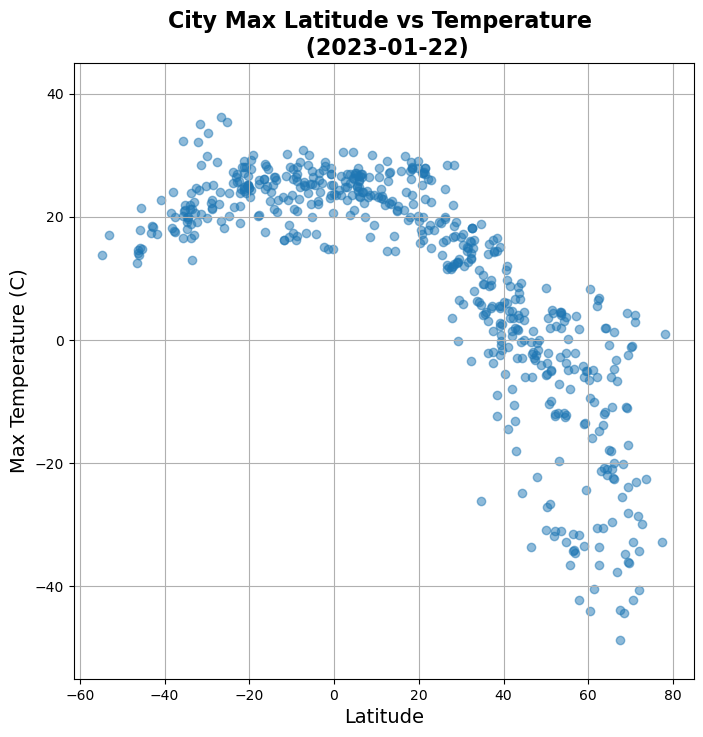

In [77]:
# Build scatter plot for latitude vs. temperature
# city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(6,5), c='DarkGreen',
              # title="City Max Latitude vs Temperature (2023-01-22)")
    
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.figure(figsize=(8,8))
plt.scatter(x_values,y_values, alpha=0.5)

# Incorporate the other graph properties

plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (C)', fontsize=14)
plt.ylim(-55,45)
plt.title('City Max Latitude vs Temperature \n (2023-01-22)', fontweight='bold', fontsize=16)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

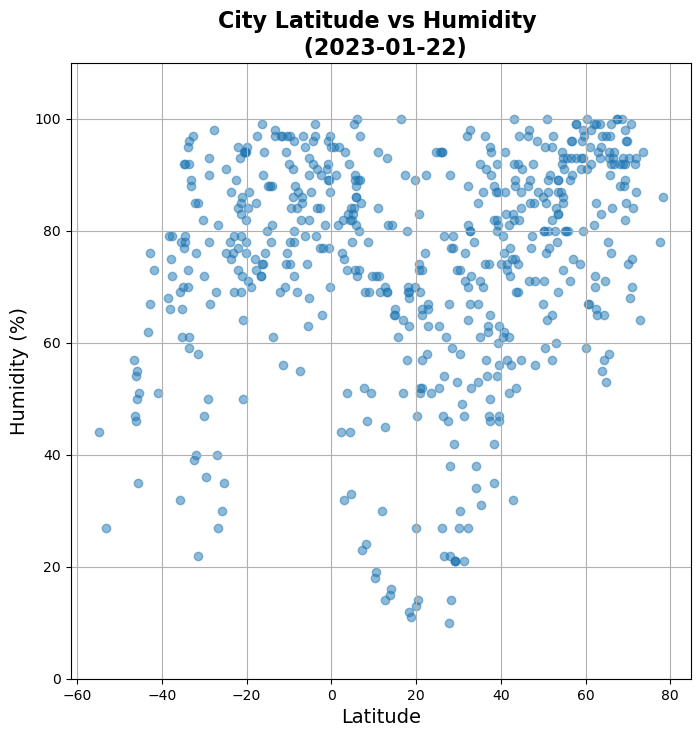

In [76]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.figure(figsize=(8,8))
plt.scatter(x_values,y_values, alpha=0.5)


# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.ylim(0,110)
plt.title('City Latitude vs Humidity \n (2023-01-22)', fontweight='bold', fontsize=16)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

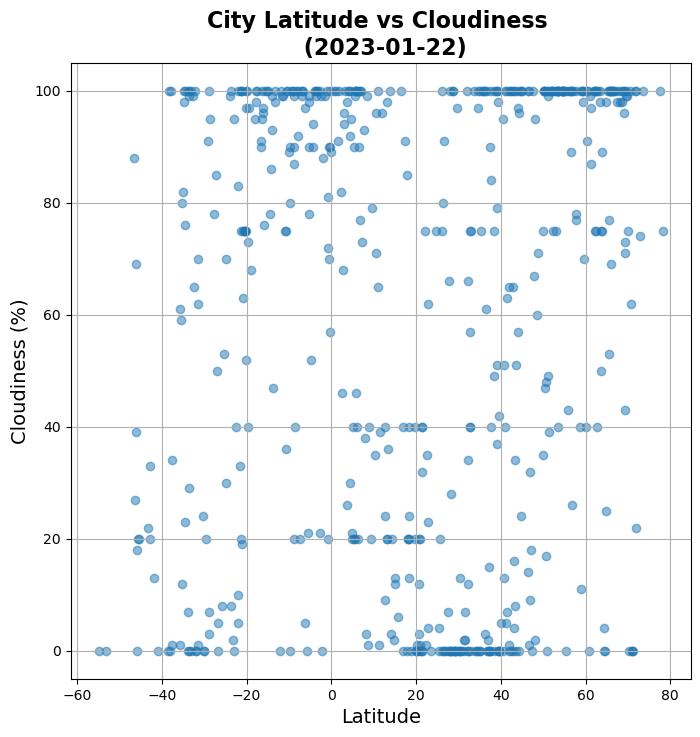

In [75]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.figure(figsize=(8,8))
plt.scatter(x_values,y_values, alpha=0.5)

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=14)
plt.ylim(-5,105)
plt.title('City Latitude vs Cloudiness \n (2023-01-22)', fontweight='bold', fontsize=16)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

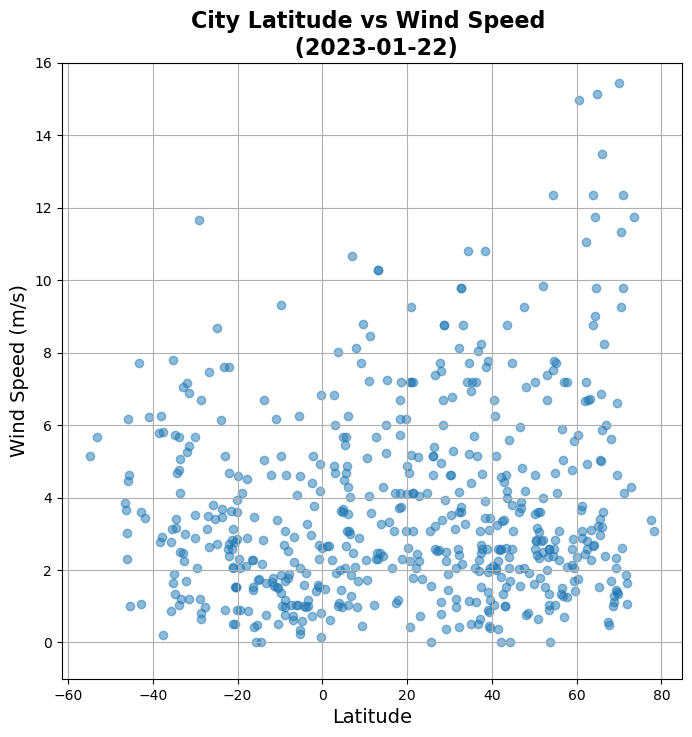

In [74]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.figure(figsize=(8,8))
plt.scatter(x_values,y_values, alpha=0.5)

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (m/s)', fontsize=14)
plt.ylim(-1,16)
plt.title('City Latitude vs Wind Speed \n (2023-01-22)', fontweight='bold', fontsize=16)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [202]:
# Define a function to create Linear Regression plots

def lin_reg_plot(x_series, y_series):
    
    # calculate linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_series, y_series)
    regress_values = x_series * slope + intercept
    
    # print r-value
    print(f'The r-value is: {rvalue}')
    
    # plot
    plt.scatter(x_series, y_series, alpha=0.5)
    plt.plot(x_series,regress_values, color='red')
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.xlabel('Latitude')
    plt.show()
    
    return line_eq

# since every chart is diffeent , establish ann function to place line_eq on each graph separately
def ann(line_eq, x, y):
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")
    

In [203]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                     
1          yerbogachen  61.2767  108.0108    -40.43        98          97   
2               dikson  73.5069   80.5464    -22.61        94         100   
8        half moon bay  37.4636 -122.4286     16.24        50           0   
9           nikolskoye  59.7035   30.7861     -5.06        97          70   
10             okhotsk  59.3833  143.3000    -24.32        80         100   

         Wind Speed Country        Date  
City_ID                                  
1              2.88      RU  1674424011  
2             11.73      RU  1674424012  
8              8.23      US  1674423923  
9              1.43      RU  1674424014  
10             5.55      RU  1674424014

In [204]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

City      Lat      Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                   
0        punta arenas -53.1500 -70.9167     17.06        27           0   
3        barreirinhas  -2.7469 -42.8264     25.49        84          21   
4             ushuaia -54.8000 -68.3000     13.81        44           0   
5            luderitz -26.6481  15.1594     19.30        81           0   
6        puerto ayora  -0.7393 -90.3518     27.98        92          72   

         Wind Speed Country        Date  
City_ID                                  
0              5.66      CL  1674424011  
3              2.96      BR  1674424012  
4              5.14      AR  1674424012  
5              7.46     NaN  1674424013  
6              2.68      EC  1674423955

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8397856219763753


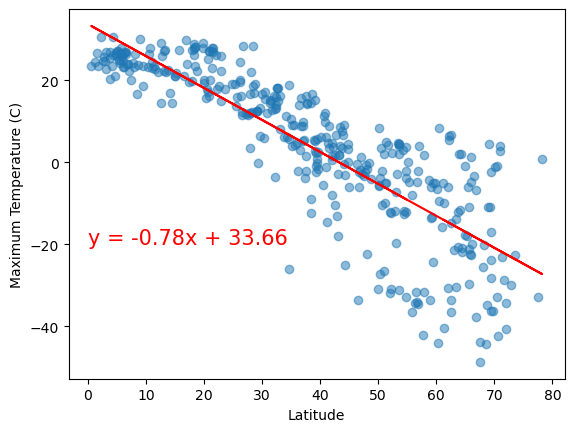

In [205]:
# Linear regression on Northern Hemisphere

plt.ylabel('Maximum Temperature (C)')
ann(line_eq, 0,-20)
temp_lat_graph = lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])


The r-value is: 0.3539358556203263


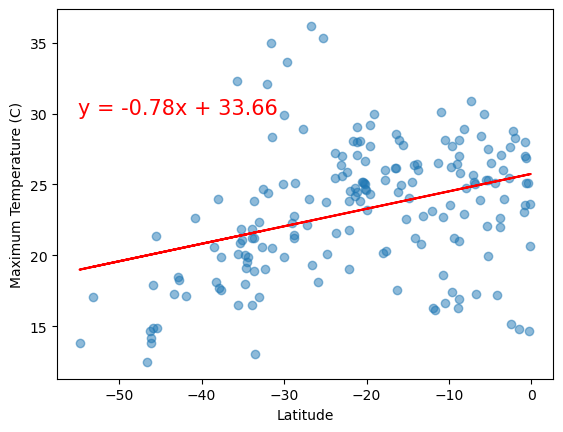

In [206]:
# Linear regression on Southern Hemisphere
plt.ylabel('Maximum Temperature (C)')
ann(line_eq, -55,30)
temp_lat_graph = lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

From the graphs above we can conclude that 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3628548019835316


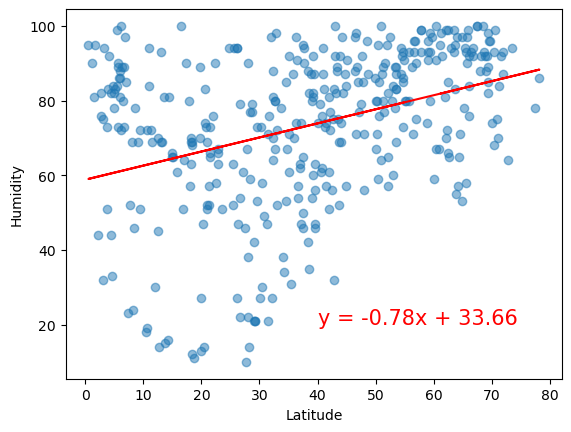

In [207]:
# Northern Hemisphere
plt.ylabel('Humidity')
ann(line_eq, 40,20)
temp_lat_graph = lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])


The r-value is: 0.4988481415205989


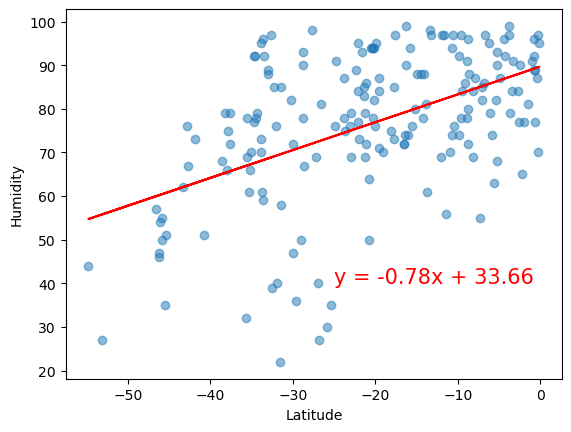

In [208]:
# Southern Hemisphere
plt.ylabel('Humidity')
ann(line_eq, -25,40)
temp_lat_graph = lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.25761059779200557


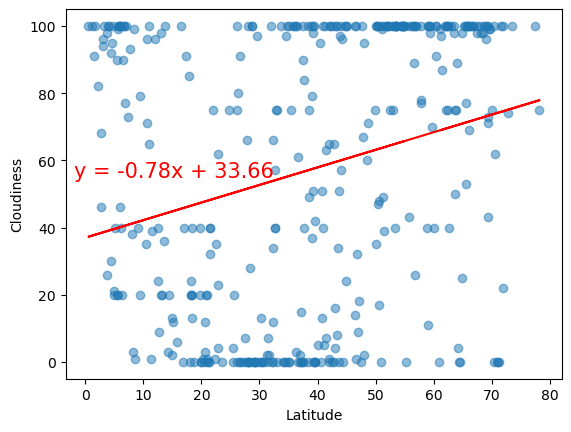

In [209]:
# Northern Hemisphere
plt.ylabel('Cloudiness')
ann(line_eq, -2,55)
temp_lat_graph = lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

The r-value is: 0.42570133852205977


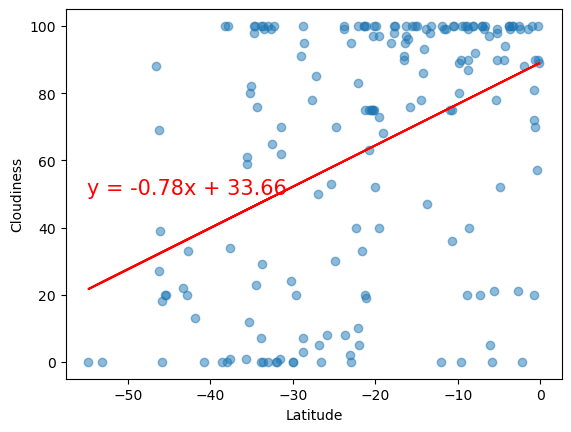

In [210]:
# Southern Hemisphere
plt.ylabel('Cloudiness')
ann(line_eq, -55,50)
temp_lat_graph = lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.09685965665335436


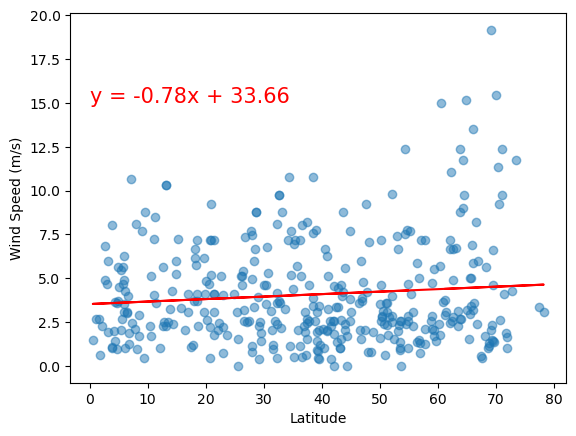

In [211]:
# Northern Hemisphere
plt.ylabel('Wind Speed (m/s)')
ann(line_eq, 0,15)
temp_lat_graph = lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

The r-value is: -0.3020393769265437


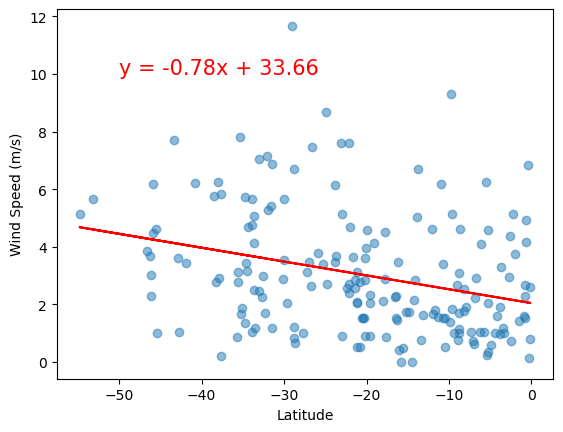

In [212]:
# Southern Hemisphere
plt.ylabel('Wind Speed (m/s)')
ann(line_eq, -50,10)
temp_lat_graph = lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE